In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [34]:
df = pd.read_csv("Algerian_forest_fires_cleaned Dataset.csv")


In [35]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


### Independent and Dependent Features 

In [36]:
X = df.drop('FWI',axis=1) # Independent Features
y = df['FWI'] # Dependent Feature

In [37]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [38]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

### Train Test Split 

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182, 11)
(61, 11)
(182,)
(61,)


### Feature selection based on Correlation

<Axes: >

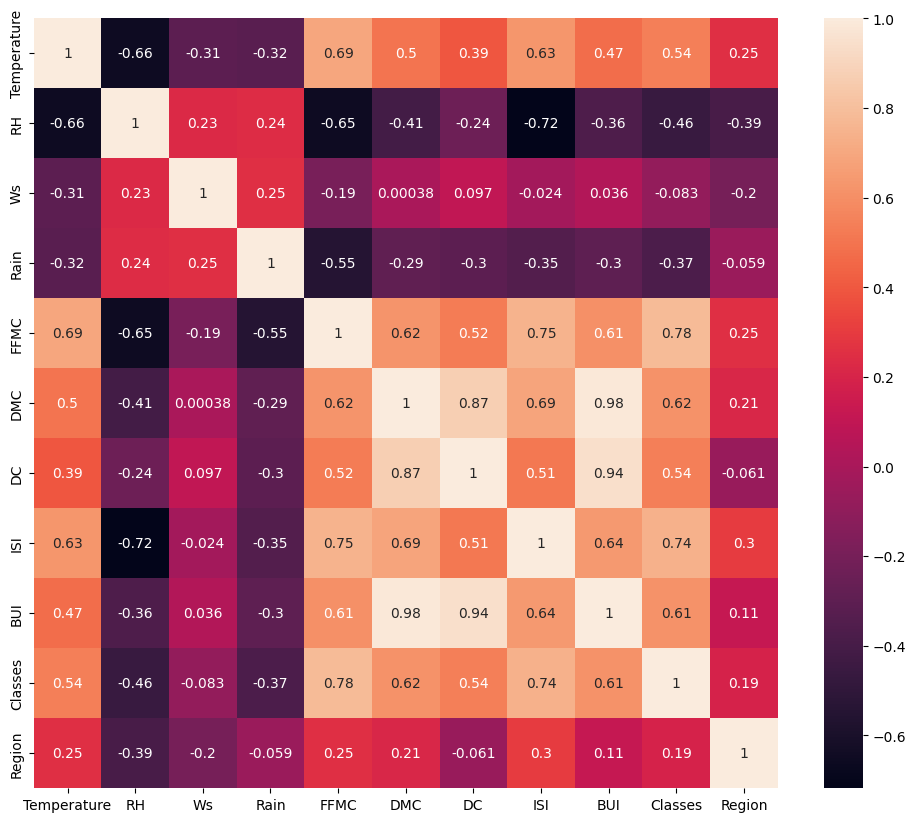

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

#### Correlation Function for Finding out the features that are not required , threshold value is determined by the domanin expert 

In [42]:
def correlation(dataset,threshold):
    col_corr= set()
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [43]:
correlation(X_train,0.85)

{'BUI', 'DC'}

### Removing the columns that are required after performing the correlation 

In [44]:
X_train.drop(['BUI','DC'],axis=1,inplace=True)
X_test.drop(['BUI','DC'],axis=1,inplace=True)

In [45]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

### Transforming the Data to scale it down using Standard Scaler 

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
X_train_scaled.shape

(182, 9)

In [49]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

Text(0.5, 1.0, 'Data before scaling')

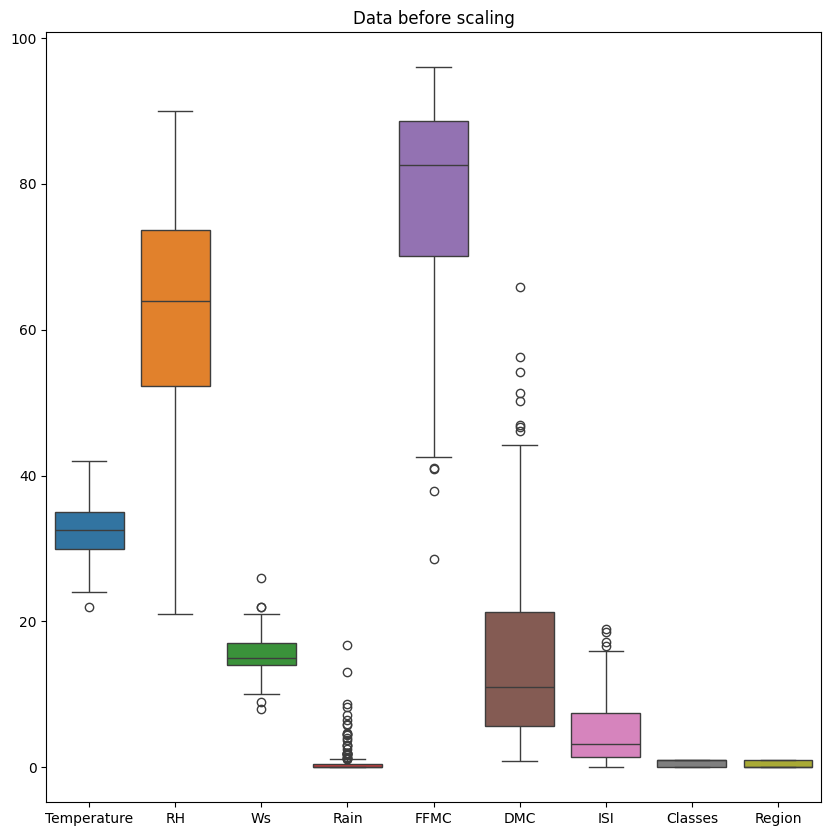

In [53]:
plt.figure(figsize=(10,10))
sns.boxplot(data=X_train)
plt.title("Data before scaling")



Text(0.5, 1.0, 'Data after scaling')

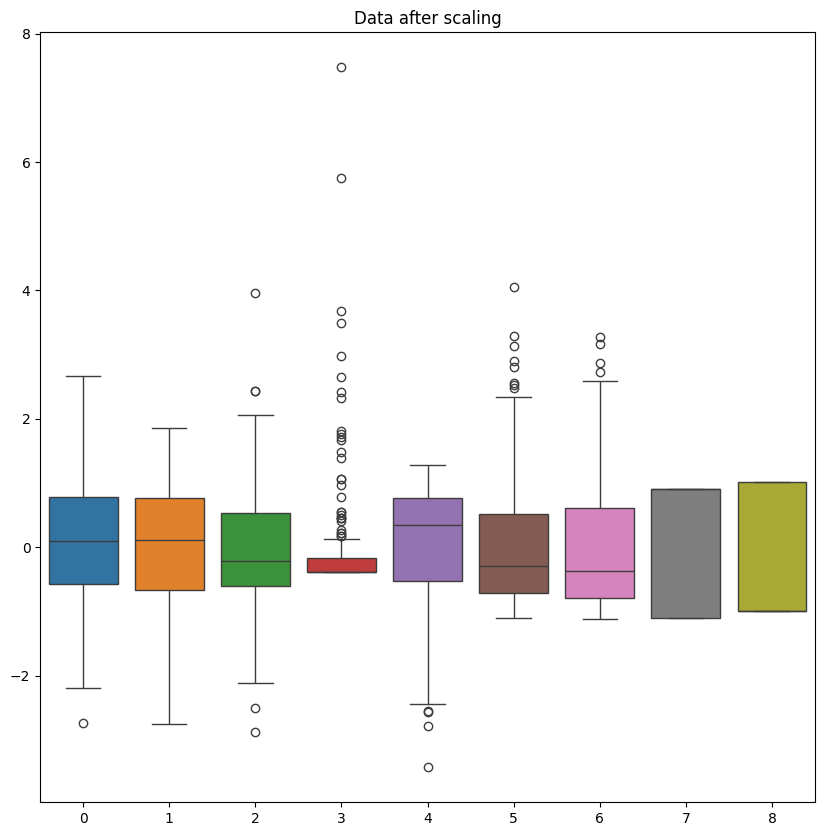

In [54]:
plt.figure(figsize=(10,10))
sns.boxplot(data=X_train_scaled)
plt.title("Data after scaling")

### Linear Regression Model

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
regression = LinearRegression()

regression.fit(X_train_scaled,y_train)

y_predict = regression.predict(X_test_scaled)


mae = mean_absolute_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)

print(f"The Mean Absolute Error :{mae}")
print(f"The r2 score :{r2}")

The Mean Absolute Error :0.546823646524997
The r2 score :0.9847657384266951


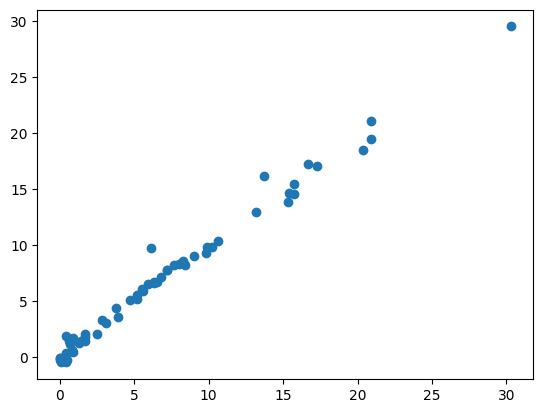

In [58]:
plt.scatter(y_test,y_predict)

### Lasso Regression 

In [59]:
from sklearn.linear_model import Lasso

lassoreg = Lasso()

lassoreg.fit(X_train_scaled,y_train)

y_pred = lassoreg.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"The Mean Absolute Error :{mae}")
print(f"The r2 score :{r2}")


The Mean Absolute Error :1.133175994914409
The r2 score :0.9492020263112388


Text(0.5, 1.0, 'Lasso Regression')

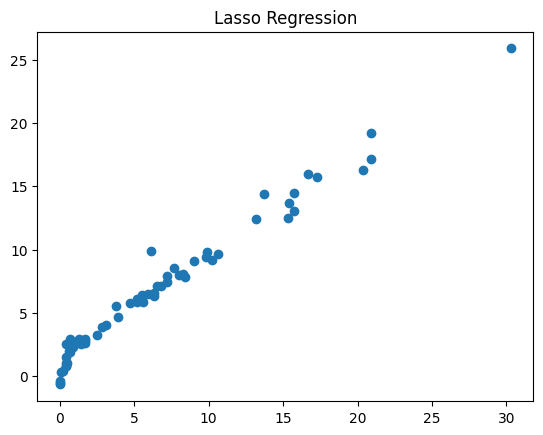

In [61]:
plt.scatter(y_test,y_pred)
plt.title("Lasso Regression")

### Ridge Regression Model 


In [62]:
from sklearn.linear_model import Ridge

ridgereg = Ridge()

ridgereg.fit(X_train_scaled,y_train)

y_pred= ridgereg.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"The Mean Absolute Error :{mae}")
print(f"The r2 score :{r2}")



The Mean Absolute Error :0.5642305340105691
The r2 score :0.9842993364555513


Text(0.5, 1.0, 'Ridge Regression')

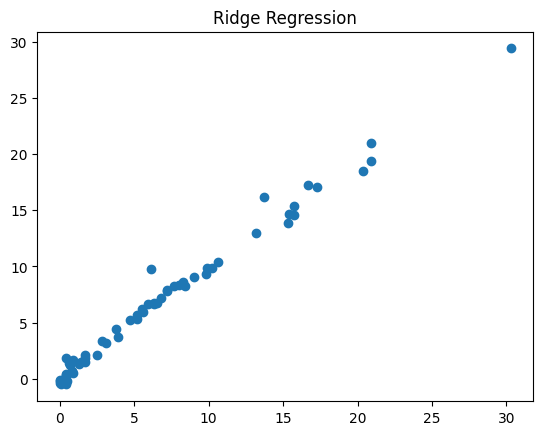

In [64]:
plt.scatter(y_test,y_pred)
plt.title("Ridge Regression")

### Elastic Net Regression

In [65]:
from sklearn.linear_model import ElasticNet

elasticnetreg = ElasticNet()

elasticnetreg.fit(X_train_scaled,y_train)

y_pred = elasticnetreg.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"The Mean Absolute Error :{mae}")
print(f"The r2 score :{r2}")


The Mean Absolute Error :1.8822353634896
The r2 score :0.8753460589519703


Text(0.5, 1.0, 'Elastic Net Regression ')

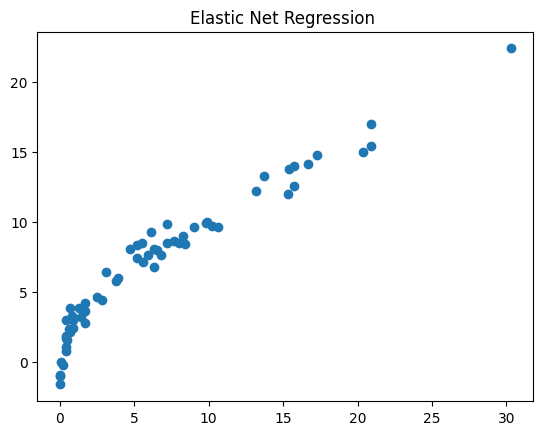

In [67]:
plt.scatter(y_test,y_pred)
plt.title("Elastic Net Regression ")